# Autocorrelation
| Author  | Stanley A. Baronett |
|---------|---------------------|
| Created | 10/27/2021          |
| Updated | 10/20/2022          |

## **Figure 4.**

Π = 0.05
	maxR_p = 56124.2
	maxR_g = 65536.7
Π = 0.05
	maxR_p = 56124.2
	maxR_g = 65536.7
Π = 0.10
	maxR_p = 10536.8
	maxR_g = 65538.1
Π = 0.10
	maxR_p = 10536.8
	maxR_g = 65538.1


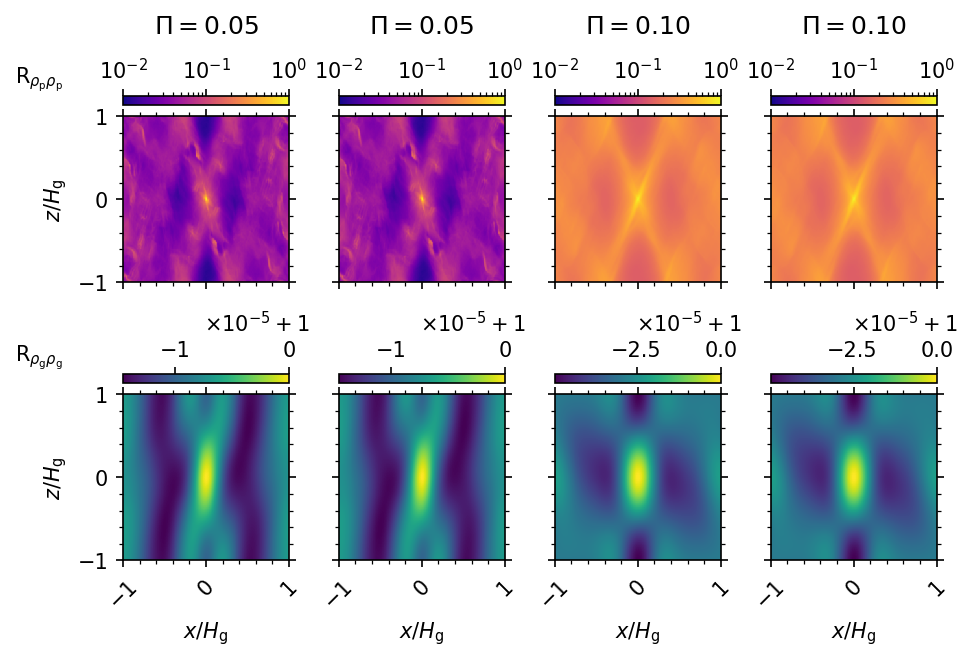

In [1]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import numpy as np
from scipy import fftpack

fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(7, 4.5), dpi=150)
workdir = '../unstrat'
case = 'BA'
Pis = ['0.05', '0.05', '0.10', '0.10']
res = '256'
# vmin_p, vmax_p = 2e-2, 2e0 # BA CPDD > 85%; CPDD < 5%

for i, Pi in enumerate(Pis):
    # Collect parameters and plot densities
    path = f'{workdir}/{case}/{Pi}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    Omega = athinput['problem']['omega']
    H_g = c_s/Omega
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xf, zf = data['x1f']/H_g, data['x2f']/H_g
    t = data['Time']
    ft = fftpack.fft2(data['rhop'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    print(f'Π = {Pi}')
    print(f'\tmaxR_p = {ac[0][0]:.1f}')
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    rhops = axs[0][i].pcolormesh(xf, zf, shift, norm=colors.LogNorm(vmin=1e-2), cmap='plasma')
    ft = fftpack.fft2(data['rho'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    print(f'\tmaxR_g = {ac[0][0]:.1f}')
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    fix = (shift-1)*1e5
    rhogs = axs[1][i].pcolormesh(xf, zf, fix)

    # Add and format dust color bars, titles, and x-axis labels
    cb_rhop = fig.colorbar(rhops, ax=axs[0][i], location='top')
    axs[0][i].set_title(f'$\Pi={Pi:s}$', pad=40)
    axs[0][i].set(aspect='equal')

    # Add and format gas color bars
    cb_rhog = fig.colorbar(rhogs, ax=axs[1][i], location='top')
    axs[1][i].set(xlabel=r'$x/H_\mathrm{g}$', aspect='equal')
    axs[1][i].text(0.49, 1.51, r'$\times10^{-5}+1$',
               ha='left', va='top', transform=axs[1][i].transAxes)

for ax in axs.flat:
    ax.label_outer()
    ax.minorticks_on()
    ax.set(aspect='equal')
    ax.tick_params(axis='both', which='both', top=True, right=True)
    ax.tick_params(axis='x', labelrotation=45)

# Format and save figure
axs[0][0].text(-0.65, 1.31, r'$\mathrm{R}_{\rho_\mathrm{p}\rho_\mathrm{p}}$',
               ha='left', va='top', transform=axs[0][0].transAxes)
axs[1][0].text(-0.65, 1.31, r'$\mathrm{R}_{\rho_\mathrm{g}\rho_\mathrm{g}}$',
               ha='left', va='top', transform=axs[1][0].transAxes)
axs[0][0].set(ylabel=r'$z/H_\mathrm{g}$')
axs[1][0].set(ylabel=r'$z/H_\mathrm{g}$')
# plt.savefig(f'figs/{case}_snaps.png', dpi=1000, bbox_inches='tight', pad_inches=0.01)
plt.subplots_adjust(wspace=0.3)
plt.show()

## **Figure 6.**

Index of shifted max: (128, 128)
Index of shifted max: (128, 128)
Index of shifted max: (128, 128)
Index of shifted max: (128, 128)


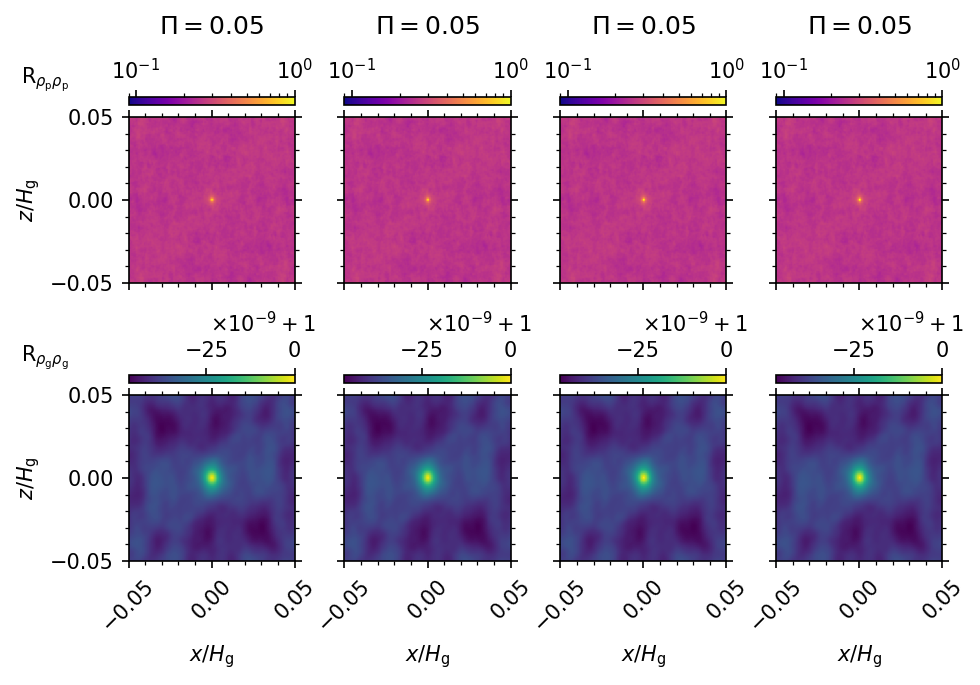

In [48]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from scipy import fftpack

fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(7, 4.5), dpi=150)
workdir = '../unstrat'
case = 'AB'
Pis = ['0.05', '0.05', '0.05', '0.05']
res = 256

for i, Pi in enumerate(Pis):
    # Collect parameters and plot densities
    path = f'{workdir}/{case}/{Pi}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    Omega = athinput['problem']['omega']
    H_g = c_s/Omega
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xf, zf = data['x1f']/H_g, data['x2f']/H_g
    ft = fftpack.fft2(data['rhop'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    flat_i = np.argmax(ac)
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    flat_i = np.argmax(shift)
    print(f'Index of shifted max: {np.unravel_index((flat_i), (res, res))}')
    rhops = axs[0][i].pcolormesh(xf, zf, shift, norm=colors.LogNorm(vmin=0.09),
                                 cmap='plasma')
    ft = fftpack.fft2(data['rho'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    offset = (shift - 1)*1e9
    rhogs = axs[1][i].pcolormesh(xf, zf, offset)

    # Add and format dust color bars, titles, and x-axis labels
    cb_rhop = fig.colorbar(rhops, ax=axs[0][i], location='top')
    axs[0][i].set_title(f'$\Pi={float(Pi)}$', pad=40)
    axs[0][i].set(aspect='equal')
    axs[1][i].set(xlabel=r'$x/H_\mathrm{g}$', aspect='equal')

    # Add and format gas color bars
    cb_rhog = fig.colorbar(rhogs, ax=axs[1][i], location='top')
    axs[1][i].text(0.49, 1.51, r'$\times10^{-9}+1$',
               ha='left', va='top', transform=axs[1][i].transAxes)
for ax in axs.flat:
    ax.label_outer()
    ax.minorticks_on()
    ax.set(aspect='equal')
    ax.tick_params(axis='both', which='both', top=True, right=True)
    ax.tick_params(axis='x', labelrotation=45)

# Format and save figure
axs[0][0].text(-0.65, 1.31,
               r'$\mathrm{R}_{\rho_\mathrm{p}\rho_\mathrm{p}}$',
               ha='left', va='top', transform=axs[0][0].transAxes)
axs[1][0].text(-0.65, 1.31,
               r'$\mathrm{R}_{\rho_\mathrm{g}\rho_\mathrm{g}}$',
               ha='left', va='top', transform=axs[1][0].transAxes)
axs[0][0].set(ylabel=r'$z/H_\mathrm{g}$')
axs[1][0].set(ylabel=r'$z/H_\mathrm{g}$')
plt.subplots_adjust(wspace=0.3)
# plt.savefig(f'figs/{case}_autocorrelations.png', dpi=1000,
#             bbox_inches='tight', pad_inches=0.01)
plt.show()

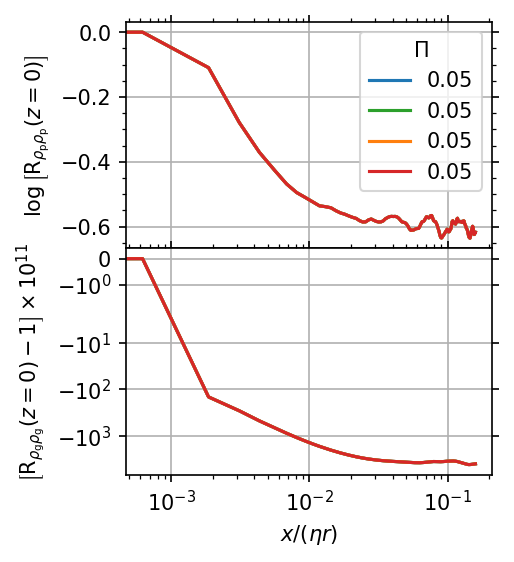

In [3]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack

fig, axs = plt.subplots(2, sharex=True, figsize=(3.15, 4), dpi=150)
workdir = '../unstrat'
case = 'AB'
Pis = [['0.05', 'tab:blue'], ['0.05', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.05', 'tab:red']]
res = 256

for i, Pi in enumerate(Pis):
    # Collect parameters and plot densities
    path = f'{workdir}/{case}/{Pi[0]}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    etar = float(Pi[0])*c_s
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xv, zv = data['x1v'], data['x2v']
    z0 = int(len(zv)/2)
    ft = fftpack.fft2(data['rhop'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    log = np.log10(shift)
    ft = fftpack.fft2(data['rho'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    offset = (shift - 1)*1e11

    axs[0].semilogx(xv/etar, log[z0], color=Pi[1], label=Pi[0])
    axs[1].semilogx(xv/etar, offset[z0], color=Pi[1])

for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)

# Format and save figure
axs[0].legend(loc='upper right', title=r'$\Pi$')
axs[0].set(ylabel=r'$\log\left[\mathrm{R}_{\rho_\mathrm{p}\rho_\mathrm{p}}(z=0)\right]$')
axs[1].set(yscale='symlog', xlabel=r'$x/(\eta r)$',
           ylabel=r'$\left[\mathrm{R}_{\rho_\mathrm{g}\rho_\mathrm{g}}(z=0)-1\right]\times10^{11}$')
plt.subplots_adjust(hspace=0)
# plt.savefig(f'figs/{case}_Rs-z0.pdf', bbox_inches='tight', pad_inches=0.01)
plt.show()

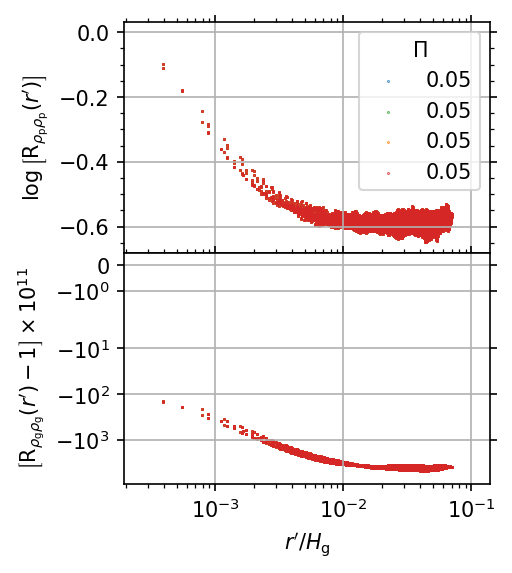

In [49]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack

def norms(xv, zv, pole):
    rv = np.zeros((len(zv), len(xv)))
    for i, z in enumerate(zv):
        for j, x in enumerate(xv):
            rv[i][j] = np.sqrt((x - pole[0])**2 + (z - pole[1])**2)
    return rv

fig, axs = plt.subplots(2, sharex=True, figsize=(3.15, 4), dpi=150)
workdir = '../unstrat'
case = 'AB'
Pis = [['0.05', 'tab:blue'], ['0.05', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.05', 'tab:red']]
res = 256

for i, Pi in enumerate(Pis):
    # Collect parameters and plot densities
    # print(f'{case}/{Pi[0]}: Processing...', flush=True)
    path = f'{workdir}/{case}/{Pi[0]}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    # etar = float(Pi[0])*c_s
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xv, zv = data['x1v'], data['x2v']
    left, right = xv[-1]/res, np.sqrt(8)*xv[-1]
    x0, z0 = int(len(xv)/2), int(len(zv)/2)
    pole = (xv[x0], zv[z0])
    rv = norms(xv, zv, pole)
    ft = fftpack.fft2(data['rhop'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    log = np.log10(shift)
    ft = fftpack.fft2(data['rho'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    offset = (shift - 1)*1e11

    axs[0].scatter(rv, log, s=0.1, color=Pi[1], label=Pi[0])
    axs[1].scatter(rv, offset, s=0.1, color=Pi[1])
    # print(f'\tdone.', flush=True)

for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)

# Format and save figure
axs[0].legend(loc='upper right', title=r'$\Pi$')
axs[0].set(ylabel=r'$\log\left[\mathrm{R}_{\rho_\mathrm{p}\rho_\mathrm{p}}(r^\prime)\right]$')
axs[1].set(xlim=(left, right), ylim=(-9e3, 0.5), xscale='log', yscale='symlog',
           xlabel=r'$r^\prime/H_\mathrm{g}$',
           ylabel=r'$\left[\mathrm{R}_{\rho_\mathrm{g}\rho_\mathrm{g}}(r^\prime)-1\right]\times10^{11}$')
plt.subplots_adjust(hspace=0)
# plt.savefig(f'figs/{case}_Rs_pow-spect.png', bbox_inches='tight', pad_inches=0.01)
plt.show()

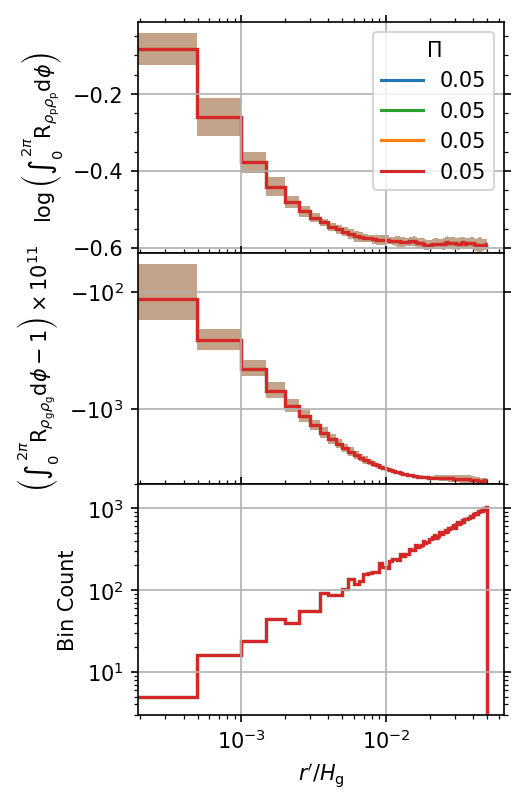

In [41]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack, stats

def norms(xv, zv, pole):
    rv = np.zeros((len(zv), len(xv)))
    for i, z in enumerate(zv):
        for j, x in enumerate(xv):
            rv[i][j] = np.sqrt((x - pole[0])**2 + (z - pole[1])**2)
    return rv

fig, axs = plt.subplots(3, sharex=True, figsize=(3.15, 6), dpi=150)
workdir = '../unstrat'
case = 'AB'
Pis = [['0.05', 'tab:blue'], ['0.05', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.05', 'tab:red']]
res = 256
bins = 100

for i, Pi in enumerate(Pis):
    # Collect parameters and plot densities
    # print(f'{case}/{Pi[0]}: Processing...', flush=True)
    path = f'{workdir}/{case}/{Pi[0]}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    etar = float(Pi[0])*c_s
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xv, zv = data['x1v'], data['x2v']
    left, right = xv[-1]/res, 1.32*xv[-1]
    x0, z0 = int(len(xv)/2), int(len(zv)/2)
    pole = (xv[x0], zv[z0])
    rv = norms(xv, zv, pole).ravel()
    indices = np.where(rv > xv[-1])[0]
    rv = np.delete(rv, indices)
    ft = fftpack.fft2(data['rhop'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    log = np.log10(shift).ravel()
    log = np.delete(log, indices)
    dust_means, bin_edges, binnumnber = stats.binned_statistic(rv,
        log, statistic='mean', bins=bins)
    dust_stds, bin_edges, binnumnber = stats.binned_statistic(rv,
        log, statistic='std', bins=bins)
    dust_highs = dust_means + dust_stds
    dust_lows = dust_means - dust_stds
    ft = fftpack.fft2(data['rho'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    offset = (shift.ravel() - 1)*1e11
    offset = np.delete(offset, indices)
    gas_means, bin_edges, binnumnber = stats.binned_statistic(rv,
        offset, statistic='mean', bins=bins)
    gas_stds, bin_edges, binnumnber = stats.binned_statistic(rv,
        offset, statistic='std', bins=bins)
    gas_highs = gas_means + gas_stds
    gas_lows = gas_means - gas_stds
    bin_counts, bin_edges, binnumnber = stats.binned_statistic(rv,
        rv, statistic='count', bins=bins)

    axs[0].stairs(dust_means, bin_edges, baseline=float('-inf'),
                  color=Pi[1], lw=1.5, label=Pi[0])
    axs[0].stairs(dust_highs, bin_edges, baseline=dust_lows, fill=True,
                                 color=Pi[1], alpha=0.2)
    axs[1].stairs(gas_means, bin_edges, baseline=float('-inf'),
                  color=Pi[1], lw=1.5)
    axs[1].stairs(gas_highs, bin_edges, baseline=gas_lows, fill=True,
                                 color=Pi[1], alpha=0.2)
    axs[2].stairs(bin_counts, bin_edges, color=Pi[1], lw=1.5)
    # print(f'\tdone.', flush=True)

for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)

# Format and save figure
axs[0].legend(title=r'$\Pi$')
axs[0].set(ylabel=r'$\log\left(\int_0^{2\pi}\mathrm{R}_{\rho_\mathrm{p}\rho_\mathrm{p}}\mathrm{d}\phi\right)$')
axs[1].set(yscale='symlog',
           ylabel=r'$\left(\int_0^{2\pi}\mathrm{R}_{\rho_\mathrm{g}\rho_\mathrm{g}}\mathrm{d}\phi-1\right)\times10^{11}$')
axs[2].set(xlim=(left, right), ylim=(3, 2e3), xscale='log', yscale='log',
           xlabel=r'$r^\prime/H_\mathrm{g}$', ylabel=r'Bin Count')
plt.subplots_adjust(hspace=0)
# plt.savefig(f'figs/{case}_Rs_rad-prof.pdf', bbox_inches='tight', pad_inches=0.01)


In [ ]:
# UNSCALE BY etar UNTIL WE'RE SATISFIED W/ RESULTS
# FIX XLIM/YLIM ISSUES

# PRUNING PTS OUTSIDE CIRCLE
# Check binned_statistics docs if data outside left/right-most edges are lumped into outer bins
#   if docs are unclear, check bin counts to verify
# Otherwise, use numpy to identify r' values > e.g. 0.05 in flattened r' array, and remove from 
# data

In [119]:
"""
UNIFORM BINS OF 4 PTS
"""

x0 = int(len(xv)/2)
print(f'x0 = {x0}')
# center of left-most bin is l_cell = box-length/res
r0 = xv[x0]
print(f'r0 = {r0}')
# center of 2nd bin is np.sqrt(2)*l_cell
r1 = np.sqrt(2)*r0
print(f'r1 = {r1}')
base = r1/r0
print(f'base = {base}')
# divide center left-most bin by sqrt(ratio) to get left-most edge
leftmost_edge = r0/np.sqrt(base)
print(f'leftmost_edge = {leftmost_edge}')
next_leftmost_edge = leftmost_edge*base
print(f'next_leftmost_edge = {next_leftmost_edge}')

# Iteratively multiply edges by ratio from left to right
num = 2
while (leftmost_edge*base**num < xv[-1]):
    # Count powers until right-most edge desired reached
    num += 1

print(f'num = {num}')
next_rightmost_edge = leftmost_edge*base**(num - 1)
print(f'next_rightmost_edge = {next_rightmost_edge}')
rightmost_edge = leftmost_edge*base**num
print(f'rightmost_edge = {rightmost_edge}')

x0 = 128
r0 = 0.0001953125
r1 = 0.0002762135864009952
base = 1.4142135623730951
leftmost_edge = 0.00016423758110424114
next_leftmost_edge = 0.000232267014648969
num = 17
next_rightmost_edge = 0.04204482076268578
rightmost_edge = 0.059460355750136126


In [120]:
x0 = int(len(xv)/2)
print(f'x0 = {x0}')
r0 = xv[x0]
print(f'r0 = {r0}')
base = np.sqrt(2)
print(f'base = {base}')
leftmost_edge = r0/np.sqrt(base)
print(f'leftmost_edge = {leftmost_edge}')
next_leftmost_edge = leftmost_edge*base
print(f'next_leftmost_edge = {next_leftmost_edge}')
num = int(np.sqrt(res) + 1)
print(f'num = {num}')
next_rightmost_edge = leftmost_edge*base**(num - 1)
print(f'next_rightmost_edge = {next_rightmost_edge}')
rightmost_edge = leftmost_edge*base**num
print(f'rightmost_edge = {rightmost_edge}')

x0 = 128
r0 = 0.0001953125
base = 1.4142135623730951
leftmost_edge = 0.00016423758110424114
next_leftmost_edge = 0.000232267014648969
num = 17
next_rightmost_edge = 0.04204482076268578
rightmost_edge = 0.059460355750136126


In [118]:
bin_edges = leftmost_edge*np.logspace(0, num, num=(num + 1), base=base)
print(f'bin_edges = {bin_edges}')

bin_edges = [0.00016424 0.00023227 0.00032848 0.00046453 0.00065695 0.00092907
 0.0013139  0.00185814 0.0026278  0.00371627 0.0052556  0.00743254
 0.01051121 0.01486509 0.02102241 0.02973018 0.04204482 0.05946036]


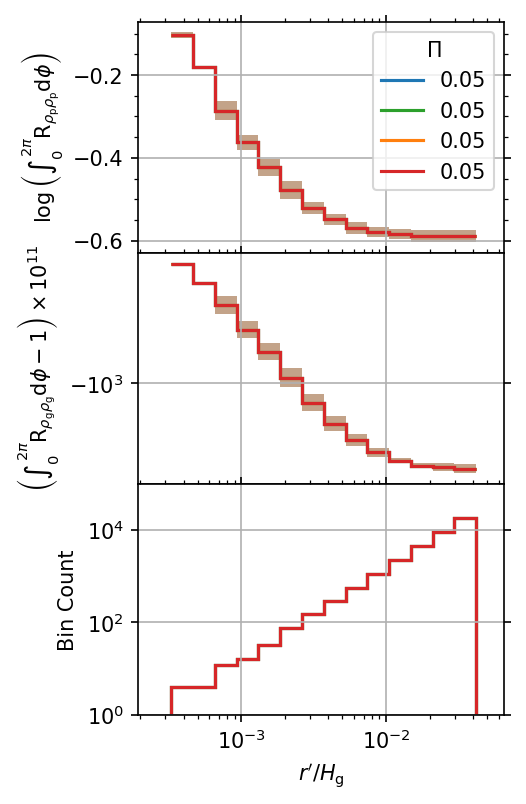

In [121]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack, stats

def norms(xv, zv, pole):
    rv = np.zeros((len(zv), len(xv)))
    for i, z in enumerate(zv):
        for j, x in enumerate(xv):
            rv[i][j] = np.sqrt((x - pole[0])**2 + (z - pole[1])**2)
    return rv

fig, axs = plt.subplots(3, sharex=True, figsize=(3.15, 6), dpi=150)
workdir = '../unstrat'
case = 'AB'
Pis = [['0.05', 'tab:blue'], ['0.05', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.05', 'tab:red']]
res = 256

for i, Pi in enumerate(Pis):
    # Collect parameters and plot densities
    # print(f'{case}/{Pi[0]}: Processing...', flush=True)
    path = f'{workdir}/{case}/{Pi[0]}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    # etar = float(Pi[0])*c_s
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xv, zv = data['x1v'], data['x2v']
    left, right = xv[-1]/res, 1.32*xv[-1]
    x0, z0 = int(len(xv)/2), int(len(zv)/2)
    pole = (xv[x0], zv[z0])
    rv = norms(xv, zv, pole).ravel()
    indices = np.where(rv > xv[-1])[0]
    rv = np.delete(rv, indices)
    ft = fftpack.fft2(data['rhop'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    log = np.log10(shift).ravel()
    log = np.delete(log, indices)
    r0 = xv[x0]
    base = np.sqrt(2)
    leftmost_edge = r0/np.sqrt(base)
    num = int(np.sqrt(res))
    bin_edges = leftmost_edge*np.logspace(0, num, num=(num + 1), base=base)
    dust_means, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        log.ravel(), statistic='mean', bins=bin_edges)
    dust_stds, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        log.ravel(), statistic='std', bins=bin_edges)
    dust_highs = dust_means + dust_stds
    dust_lows = dust_means - dust_stds
    ft = fftpack.fft2(data['rho'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    offset = (shift.ravel() - 1)*1e11
    offset = np.delete(offset, indices)
    gas_means, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        offset.ravel(), statistic='mean', bins=bin_edges)
    gas_stds, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        offset.ravel(), statistic='std', bins=bin_edges)
    gas_highs = gas_means + gas_stds
    gas_lows = gas_means - gas_stds
    bin_counts, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        rv.ravel(), statistic='count', bins=bin_edges)

    axs[0].stairs(dust_means, bin_edges, baseline=float('-inf'),
                  color=Pi[1], lw=1.5, label=Pi[0])
    axs[0].stairs(dust_highs, bin_edges, baseline=dust_lows, fill=True,
                color=Pi[1], alpha=0.2)
    axs[1].stairs(gas_means, bin_edges, baseline=float('-inf'),
                  color=Pi[1], lw=1.5)
    axs[1].stairs(gas_highs, bin_edges, baseline=gas_lows, fill=True,
                  color=Pi[1], alpha=0.2)
    axs[2].stairs(bin_counts, bin_edges, color=Pi[1], lw=1.5)
    # print(f'\tdone.', flush=True)

for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)

# Format and save figure
axs[0].legend(title=r'$\Pi$')
axs[0].set(ylabel=r'$\log\left(\int_0^{2\pi}\mathrm{R}_{\rho_\mathrm{p}\rho_\mathrm{p}}\mathrm{d}\phi\right)$')
axs[1].set(yscale='symlog',
           ylabel=r'$\left(\int_0^{2\pi}\mathrm{R}_{\rho_\mathrm{g}\rho_\mathrm{g}}\mathrm{d}\phi-1\right)\times10^{11}$')
axs[2].set(xlim=(left, right), ylim=(1, 1e5), xscale='log', yscale='log',
           xlabel=r'$r^\prime/H_\mathrm{g}$',
           ylabel=r'Bin Count')
plt.subplots_adjust(hspace=0)
# plt.savefig(f'figs/{case}_Rs_rad-prof.pdf', bbox_inches='tight', pad_inches=0.01)


In [125]:
#define function to calculate equal-frequency bins 
def equal_count_bin_edges(data, nbin):
    """
    https://www.statology.org/equal-frequency-binning-python/
    """
    print(f'data = {data}')
    print(f'nbin = {nbin}')
    nlen = len(data)
    print(f'nlen = {nlen}')
    x = np.linspace(0, nlen, nbin + 1)
    print(f'x = {x}')
    xp = np.arange(nlen)
    print(f'xp = {xp}')
    fp = np.sort(data)
    print(f'fp = {fp}')
    return np.interp(x, xp, fp)

equal_count_bin_edges(rv, 100)

data = [0.04979511 0.04976293 0.04973379 ... 0.04973379 0.04976293 0.04979511]
nbin = 100
nlen = 51101
x = [    0.     511.01  1022.02  1533.03  2044.04  2555.05  3066.06  3577.07
  4088.08  4599.09  5110.1   5621.11  6132.12  6643.13  7154.14  7665.15
  8176.16  8687.17  9198.18  9709.19 10220.2  10731.21 11242.22 11753.23
 12264.24 12775.25 13286.26 13797.27 14308.28 14819.29 15330.3  15841.31
 16352.32 16863.33 17374.34 17885.35 18396.36 18907.37 19418.38 19929.39
 20440.4  20951.41 21462.42 21973.43 22484.44 22995.45 23506.46 24017.47
 24528.48 25039.49 25550.5  26061.51 26572.52 27083.53 27594.54 28105.55
 28616.56 29127.57 29638.58 30149.59 30660.6  31171.61 31682.62 32193.63
 32704.64 33215.65 33726.66 34237.67 34748.68 35259.69 35770.7  36281.71
 36792.72 37303.73 37814.74 38325.75 38836.76 39347.77 39858.78 40369.79
 40880.8  41391.81 41902.82 42413.83 42924.84 43435.85 43946.86 44457.87
 44968.88 45479.89 45990.9  46501.91 47012.92 47523.93 48034.94 48545.95
 49056.96 49567.9

array([0.        , 0.00500244, 0.00704209, 0.00862919, 0.00995902,
       0.01111738, 0.01220352, 0.01321791, 0.0140896 , 0.0149513 ,
       0.0157466 , 0.0165221 , 0.0172467 , 0.01798573, 0.01865618,
       0.01929545, 0.0199257 , 0.02052919, 0.02114072, 0.02170694,
       0.02227111, 0.02282066, 0.02337557, 0.0238793 , 0.02438589,
       0.02491747, 0.02540264, 0.02587577, 0.02635489, 0.02682829,
       0.02730187, 0.02774538, 0.02817379, 0.02861178, 0.02903529,
       0.02946566, 0.02989494, 0.03028289, 0.03070322, 0.03110562,
       0.0315053 , 0.03188084, 0.03229692, 0.03266802, 0.03304521,
       0.03342299, 0.03377043, 0.03414786, 0.03450871, 0.0348708 ,
       0.03521046, 0.03557905, 0.03593962, 0.03626927, 0.03661055,
       0.03694454, 0.03727897, 0.03759956, 0.03792886, 0.03828324,
       0.03860474, 0.03891574, 0.03922816, 0.03953619, 0.03985753,
       0.04017175, 0.04046317, 0.04077683, 0.04107094, 0.04140625,
       0.0416927 , 0.04197901, 0.04227602, 0.04257992, 0.04283

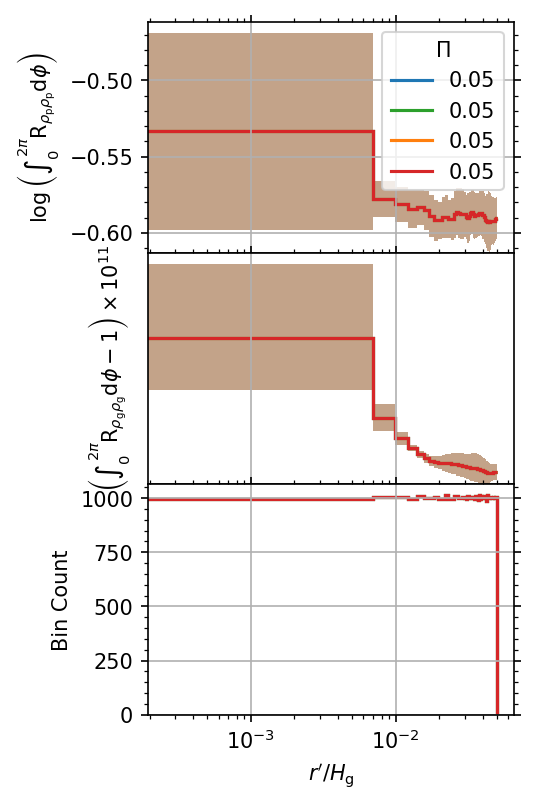

In [154]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack, stats

def norms(xv, zv, pole):
    rv = np.zeros((len(zv), len(xv)))
    for i, z in enumerate(zv):
        for j, x in enumerate(xv):
            rv[i][j] = np.sqrt((x - pole[0])**2 + (z - pole[1])**2)
    return rv

def equal_count_bin_edges(data, nbin):
    """
    https://www.statology.org/equal-frequency-binning-python/
    """
    nlen = len(data)
    x = np.linspace(0, nlen, nbin + 1)
    xp = np.arange(nlen)
    fp = np.sort(data)
    return np.interp(x, xp, fp)

fig, axs = plt.subplots(3, sharex=True, figsize=(3.15, 6), dpi=150)
workdir = '../unstrat'
case = 'AB'
Pis = [['0.05', 'tab:blue'], ['0.05', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.05', 'tab:red']]
res = 256

for i, Pi in enumerate(Pis):
    # Collect parameters
    # print(f'{case}/{Pi[0]}: Processing...', flush=True)
    path = f'{workdir}/{case}/{Pi[0]}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    # etar = float(Pi[0])*c_s
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xv, zv = data['x1v'], data['x2v']
    left, right = xv[-1]/res, 1.32*xv[-1]
    x0, z0 = int(len(xv)/2), int(len(zv)/2)
    pole = (xv[x0], zv[z0])
    rv = norms(xv, zv, pole).ravel()
    indices = np.where(rv > xv[-1])[0]
    rv = np.delete(rv, indices)
    bin_count = 1000
    bin_edges = equal_count_bin_edges(rv, int(len(rv)/bin_count))
    # Process dust
    ft = fftpack.fft2(data['rhop'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    log = np.log10(shift).ravel()
    log = np.delete(log, indices)
    dust_means, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        log.ravel(), statistic='mean', bins=bin_edges)
    dust_stds, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        log.ravel(), statistic='std', bins=bin_edges)
    dust_highs = dust_means + dust_stds
    dust_lows = dust_means - dust_stds
    # Process gas
    ft = fftpack.fft2(data['rho'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    offset = (shift.ravel() - 1)*1e11
    offset = np.delete(offset, indices)
    gas_means, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        offset.ravel(), statistic='mean', bins=bin_edges)
    gas_stds, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        offset.ravel(), statistic='std', bins=bin_edges)
    gas_highs = gas_means + gas_stds
    gas_lows = gas_means - gas_stds
    bin_counts, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        rv.ravel(), statistic='count', bins=bin_edges)

    axs[0].stairs(dust_means, bin_edges, baseline=float('-inf'),
                  color=Pi[1], lw=1.5, label=Pi[0])
    axs[0].stairs(dust_highs, bin_edges, baseline=dust_lows, fill=True,
                color=Pi[1], alpha=0.2)
    axs[1].stairs(gas_means, bin_edges, baseline=float('-inf'),
                  color=Pi[1], lw=1.5)
    axs[1].stairs(gas_highs, bin_edges, baseline=gas_lows, fill=True,
                  color=Pi[1], alpha=0.2)
    axs[2].stairs(bin_counts, bin_edges, color=Pi[1], lw=1.5)
    # print(f'\tdone.', flush=True)

for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)

# Format and save figure
axs[0].legend(title=r'$\Pi$')
axs[0].set(ylabel=r'$\log\left(\int_0^{2\pi}\mathrm{R}_{\rho_\mathrm{p}\rho_\mathrm{p}}\mathrm{d}\phi\right)$')
axs[1].set(yscale='symlog',
           ylabel=r'$\left(\int_0^{2\pi}\mathrm{R}_{\rho_\mathrm{g}\rho_\mathrm{g}}\mathrm{d}\phi-1\right)\times10^{11}$')
axs[2].set(xlim=(left, right), xscale='log', xlabel=r'$r^\prime/H_\mathrm{g}$',
           ylabel=r'Bin Count')
plt.subplots_adjust(hspace=0)
# plt.savefig(f'figs/{case}_Rs_rad-prof.pdf', bbox_inches='tight', pad_inches=0.01)


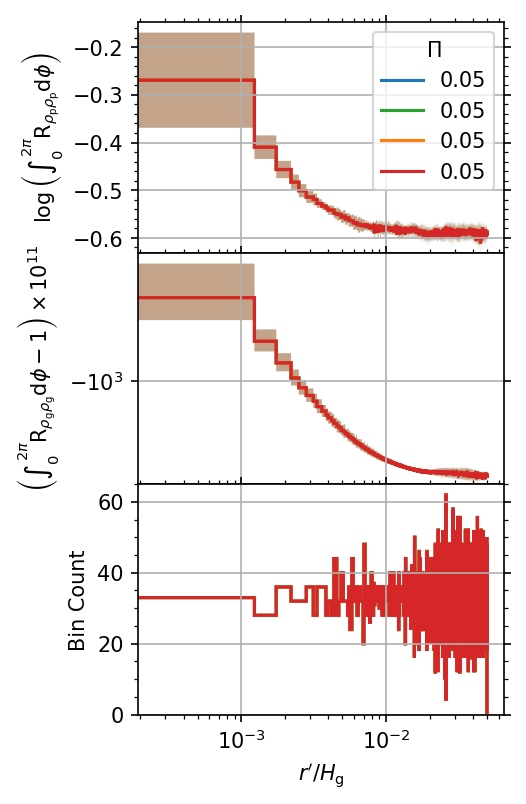

In [144]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack, stats

def norms(xv, zv, pole):
    rv = np.zeros((len(zv), len(xv)))
    for i, z in enumerate(zv):
        for j, x in enumerate(xv):
            rv[i][j] = np.sqrt((x - pole[0])**2 + (z - pole[1])**2)
    return rv

def equal_count_bin_edges(data, nbin):
    """
    https://www.statology.org/equal-frequency-binning-python/
    """
    nlen = len(data)
    x = np.linspace(0, nlen, nbin + 1)
    xp = np.arange(nlen)
    fp = np.sort(data)
    return np.interp(x, xp, fp)

fig, axs = plt.subplots(3, sharex=True, figsize=(3.15, 6), dpi=150)
workdir = '../unstrat'
case = 'AB'
Pis = [['0.05', 'tab:blue'], ['0.05', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.05', 'tab:red']]
res = 256

for i, Pi in enumerate(Pis):
    # Collect parameters
    # print(f'{case}/{Pi[0]}: Processing...', flush=True)
    path = f'{workdir}/{case}/{Pi[0]}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    # etar = float(Pi[0])*c_s
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xv, zv = data['x1v'], data['x2v']
    left, right = xv[-1]/res, 1.32*xv[-1]
    x0, z0 = int(len(xv)/2), int(len(zv)/2)
    pole = (xv[x0], zv[z0])
    rv = norms(xv, zv, pole).ravel()
    indices = np.where(rv > xv[-1])[0]
    rv = np.delete(rv, indices)
    bin_count = 33
    bin_edges = equal_count_bin_edges(rv, int(len(rv)/bin_count))
    # Process dust
    ft = fftpack.fft2(data['rhop'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    log = np.log10(shift).ravel()
    log = np.delete(log, indices)
    dust_means, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        log.ravel(), statistic='mean', bins=bin_edges)
    dust_stds, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        log.ravel(), statistic='std', bins=bin_edges)
    dust_highs = dust_means + dust_stds
    dust_lows = dust_means - dust_stds
    # Process gas
    ft = fftpack.fft2(data['rho'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    offset = (shift.ravel() - 1)*1e11
    offset = np.delete(offset, indices)
    gas_means, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        offset.ravel(), statistic='mean', bins=bin_edges)
    gas_stds, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        offset.ravel(), statistic='std', bins=bin_edges)
    gas_highs = gas_means + gas_stds
    gas_lows = gas_means - gas_stds
    bin_counts, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        rv.ravel(), statistic='count', bins=bin_edges)

    axs[0].stairs(dust_means, bin_edges, baseline=float('-inf'),
                  color=Pi[1], lw=1.5, label=Pi[0])
    axs[0].stairs(dust_highs, bin_edges, baseline=dust_lows, fill=True,
                color=Pi[1], alpha=0.2)
    axs[1].stairs(gas_means, bin_edges, baseline=float('-inf'),
                  color=Pi[1], lw=1.5)
    axs[1].stairs(gas_highs, bin_edges, baseline=gas_lows, fill=True,
                  color=Pi[1], alpha=0.2)
    axs[2].stairs(bin_counts, bin_edges, color=Pi[1], lw=1.5)
    # print(f'\tdone.', flush=True)

for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)

# Format and save figure
axs[0].legend(title=r'$\Pi$')
axs[0].set(ylabel=r'$\log\left(\int_0^{2\pi}\mathrm{R}_{\rho_\mathrm{p}\rho_\mathrm{p}}\mathrm{d}\phi\right)$')
axs[1].set(yscale='symlog',
           ylabel=r'$\left(\int_0^{2\pi}\mathrm{R}_{\rho_\mathrm{g}\rho_\mathrm{g}}\mathrm{d}\phi-1\right)\times10^{11}$')
axs[2].set(xlim=(left, right), xscale='log', xlabel=r'$r^\prime/H_\mathrm{g}$',
           ylabel=r'Bin Count')
plt.subplots_adjust(hspace=0)
# plt.savefig(f'figs/{case}_Rs_rad-prof.pdf', bbox_inches='tight', pad_inches=0.01)
